# Table Of Contents

1. [Problem Statement](#section1)<br>
2. [Getting the System ready](#section2)<br>
    - 2.1 [Loading Packages](#section201)<br/>
    - 2.2 [Reading Data](#section201)<br/>
3. [Understaning Data](#section3)<br>
4. [Correlation](#section4)<br>
5. [Missing Value Treatment](#section5)<br>
6. [Univariate Analysis](#section6)<br>
7. [Bivariate Analysis](#section7)<br>
8. [Feature Engineering](#section8)<br>
    - 8.1 [Most Popular and Least Popular Candies](#section801)<br/>
    - 8.2 [Identifying the Components that make a Good Candy](#section802)<br/>
    - 8.3 [Feature Importance of Various Attributes](#section803)<br/>
9. [Model Building](#section0)<br>
    - 9.1 [Most Popular and Least Popular Candies](#section901)<br/>
    - 9.2 [Identifying the Components that make a Good Candy](#section902)<br/>
    - 9.3 [Feature Importance of Various Attributes](#section903)<br/>
    - 9.4 [Most Popular and Least Popular Candies](#section904)<br/>
    - 9.5 [Identifying the Components that make a Good Candy](#section905)<br/>
    - 9.6 [Feature Importance of Various Attributes](#section906)<br/>
    - 9.7 [Most Popular and Least Popular Candies](#section907)<br/>
    - 9.8 [Identifying the Components that make a Good Candy](#section908)<br/>
    - 9.9 [Feature Importance of Various Attributes](#section909)<br/>
10. [Model Comparision](#section10)<br>
11. [Conclusion](#section11)<br>
    


## 1. Problem Statement 

- What’s the best (or at least the most popular) Halloween candy? That was the question this dataset was collected to answer. From the given data, 
- we will find which is the most important component for a chocolate to be most popular. Also, for a given set of components, we will predict the win percentage of the chocolate. 
- we will use basic python modules __pandas, seaborn,matplotlib,mlxtend, sklearn__ etc, and finally we will build different machine learning algorithms. 
- We will also find out which is the best fit algorithom for the given dataset.

## 2. Getting the system ready and loading the data

## 2.1 Loading Packages

In [1]:
!pip install mlxtend

In [2]:
%matplotlib inline

import pandas as pd
import seaborn as sns 
from IPython.display import display
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
import math
import warnings
warnings.simplefilter('ignore')

## 2.2 Reading data


In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv')
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


## 3. Understanding the data

In [4]:
data.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [5]:
data.shape

(85, 13)

we have 85 rows and 13 columns in our dataset. __winpercent__ is the dependent variable and rest 12 columns are independent variables.

Now, lets get to know about all the properties of the variables of our dataset.

In [6]:
data.describe(include='all')

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
unique,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Twizzlers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,NaN,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998


Round off all numeric variables to 3 decimal places.

In [7]:
data.sugarpercent = round(data.sugarpercent,3)
data.pricepercent = round(data.pricepercent,3)
data.winpercent = round(data.winpercent,3)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.7+ KB


## 4. CORRELATION 
Lets plot the correlation matrix of the dataset to find out how each variables are correlated to other variables.

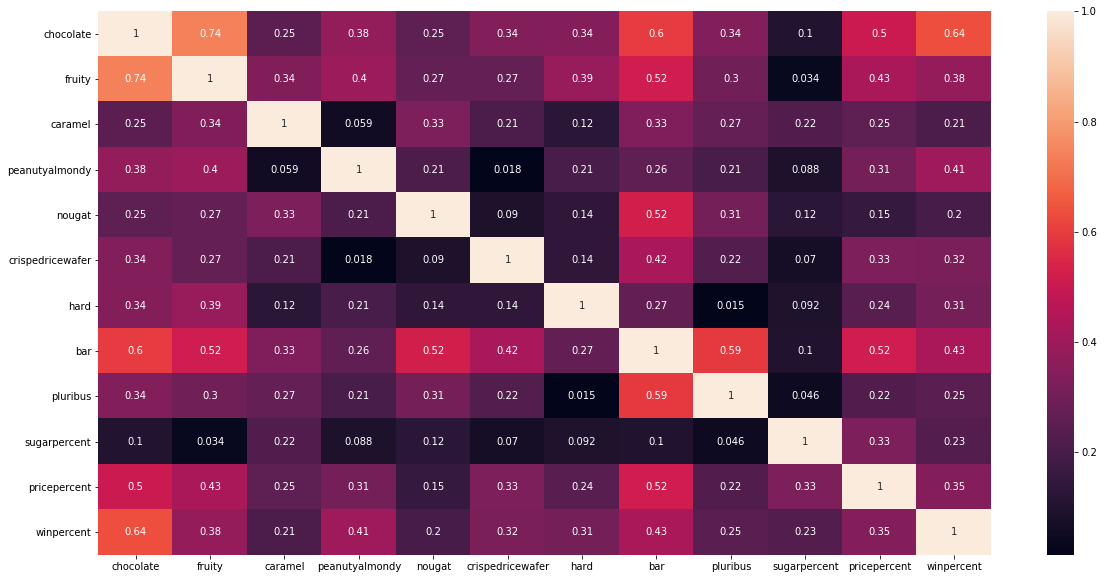

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr().abs(),annot=True)

Find out which variables are high correlated

In [10]:
def corrank(X):
    import itertools
    df = pd.DataFrame([[i,j,X.corr().abs().loc[i,j]] for i,j in list(itertools.combinations(X.corr().abs(), 2))],columns=['Feature1','Feature2','corr'])    
    return df.sort_values(by='corr',ascending=False).reset_index(drop=True)

In [11]:
corrank(data)

,Feature1,Feature2,corr
0,chocolate,fruity,0.741721
1,chocolate,winpercent,0.636517
2,chocolate,bar,0.597421
3,bar,pluribus,0.593409
4,nougat,bar,0.522976
5,bar,pricepercent,0.518407
6,fruity,bar,0.515066
7,chocolate,pricepercent,0.504675
8,fruity,pricepercent,0.430969
9,bar,winpercent,0.429933


## 5. Missing Value Treatment

In [12]:
data.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

So, we don't have any missing value in our dataset.

We will continue our analysis and build the models based on the winner data , where winpercentage is at least more than 60.

In [13]:
winners = data[data.winpercent>data.winpercent.quantile(.6)]
winners.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.972
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.603
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.915
18,Haribo Gold Bears,0,1,0,0,0,0,0,0,1,0.465,0.465,57.120
22,HersheyÕs Kisses,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375


__Most Frequently used Compositions__

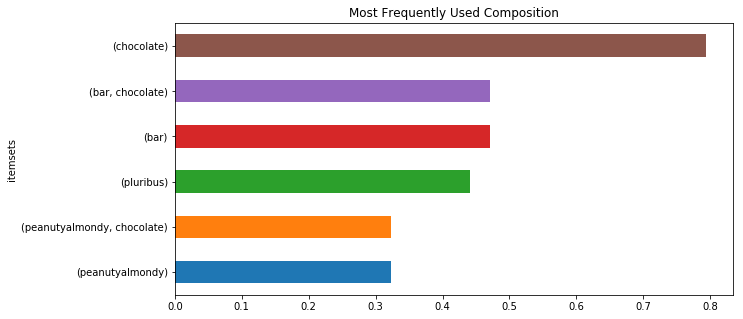

In [14]:
from mlxtend.frequent_patterns import apriori
df =  winners[data.columns[1:-3]]
association = apriori(df, min_support=0.3,use_colnames=True).sort_values(by='support')


association.plot(kind='barh',x='itemsets',y='support',title=f'Most Frequently Used Composition',sort_columns=True,figsize = (10,5),legend=False)

## 6. Univariate Analysis

### A. Chocolate

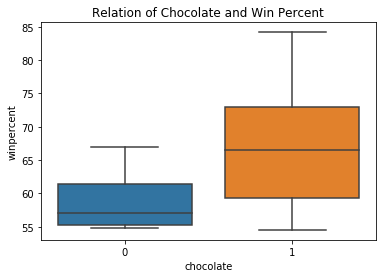

In [15]:
sns.boxplot(x="chocolate", y="winpercent", data=winners).set_title('Relation of Chocolate and Win Percent');

__Inference__

From the above plot we can say that more than 70% of the population likes Chocolate so it might be important parameter.

### B. Fruity

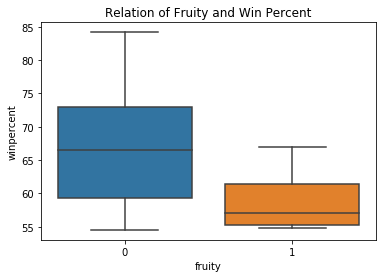

In [16]:
sns.boxplot(x="fruity", y="winpercent", data=winners).set_title('Relation of Fruity and Win Percent');


__Inference__

From the above plot we can say that bigger part of the population does not like fruity in candy, so it might be important parameter.

### C. Caramel

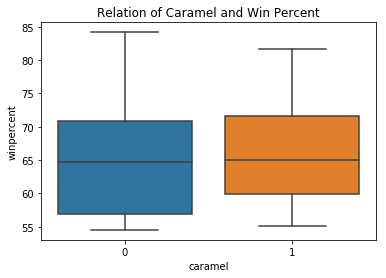

In [17]:
sns.boxplot(x="caramel", y="winpercent", data=winners).set_title('Relation of Caramel and Win Percent');

__Inference__

From the above plot we can say that more than 60% of the population likes Chocolate so it might be important parameter. But, it is also to be noticed that many people does not like caramel.

### D. Peanut/Almond

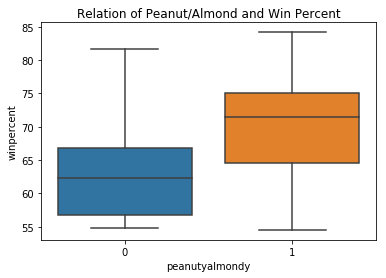

In [18]:
sns.boxplot(x="peanutyalmondy", y="winpercent", data=winners).set_title('Relation of Peanut/Almond and Win Percent');

__Inference__

From above plot we can see that winpercentage is very high when Peanut/Almond is used, hence it might be an important parameter.

### E. Wafer

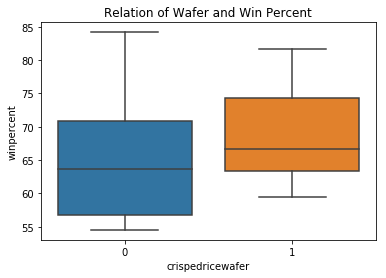

In [19]:
sns.boxplot(x="crispedricewafer", y="winpercent", data=winners).set_title('Relation of Wafer and Win Percent');

__Inference__

From the above plot we can say that more than 60% of the population likes Wafer so it might be important parameter.

### F. Hardness

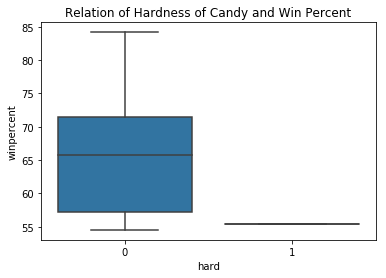

In [20]:
sns.boxplot(x="hard", y="winpercent", data=winners).set_title('Relation of Hardness of Candy and Win Percent');

__Inference__

From the above plot we can say that most of the population likes Soft Candies and almost no one likes hardness in candies, so it might be important parameter.

### G. Bar

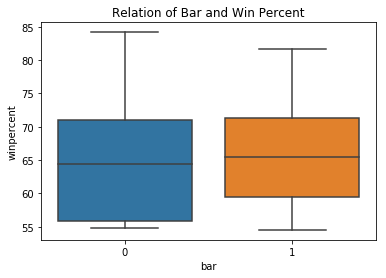

In [21]:
sns.boxplot(x="bar", y="winpercent", data=winners).set_title('Relation of Bar and Win Percent');

__Inference__

From the above plot we can say that more than 60% of the population likes Bar.

But the confidence boundy is very less to reach out to a clear conlusion.

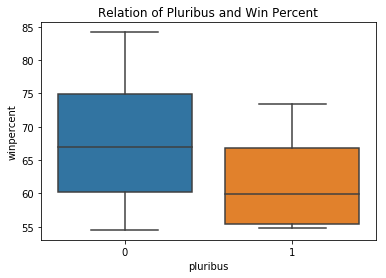

In [22]:
sns.boxplot(x="pluribus", y="winpercent", data=winners).set_title('Relation of Pluribus and Win Percent');

__Inference__

From above plot we can see that absence of pluribus leads to a higher winpercentage. Hence, it might also be an important parameter.

## 7. Bivariate Analysis

### A. sugarpercent VS winpercent

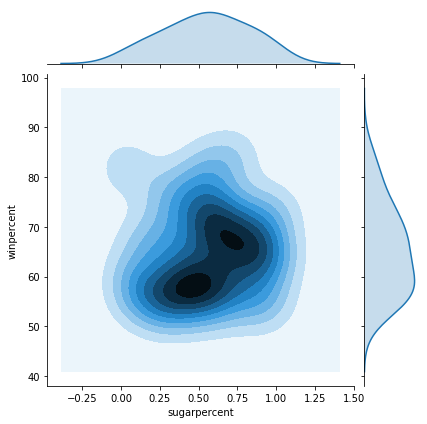

In [23]:
sns.jointplot(x="sugarpercent", y="winpercent", data=winners,kind="kde")

__Linearity of Sugar and Win Percent__

The above plot proves the alternative hypothesis that sugar percentage is not linear to the popularity of the candy i.e. sugar content of candy doesn't contribute to the popularity of the candy.

### B. pricepercent VS winpercent

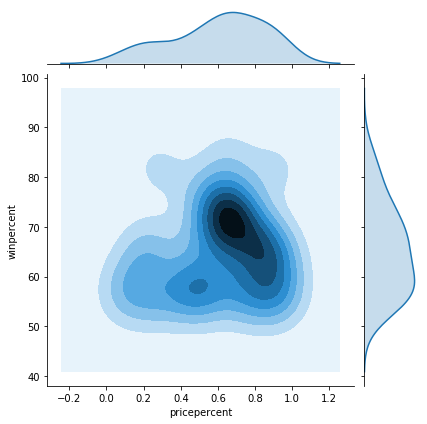

In [24]:
sns.jointplot(x="pricepercent", y="winpercent", data=winners,kind="kde")

__Linearity of Price and Win Percent__

The above plot proves the alternative hypothesis that price percentage is not linear to the popularity of the candy i.e. cost of candy doesn't contribute to the popularity of the candy.

# 8. Feature Engineering : 

## 8.1 Most Popular and Least Popular Candies

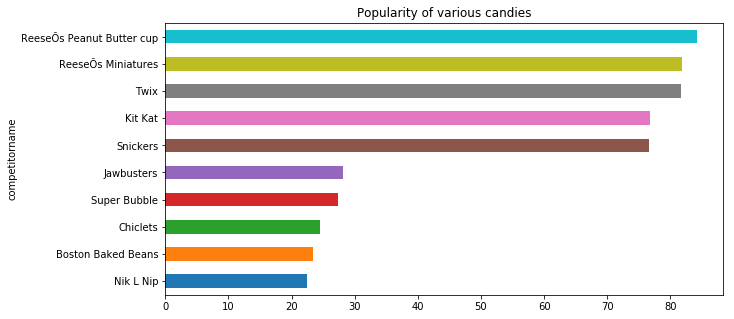

In [25]:
popularity = data[['competitorname','winpercent']].sort_values(by='winpercent')
pd.concat([popularity.head(5),popularity.tail(5)],axis=0).plot(x='competitorname',y='winpercent',kind='barh',title='Popularity of various candies',sort_columns=True,figsize = (10,5),legend=False)

## 8.2 Identifying the Components that make a Good Candy

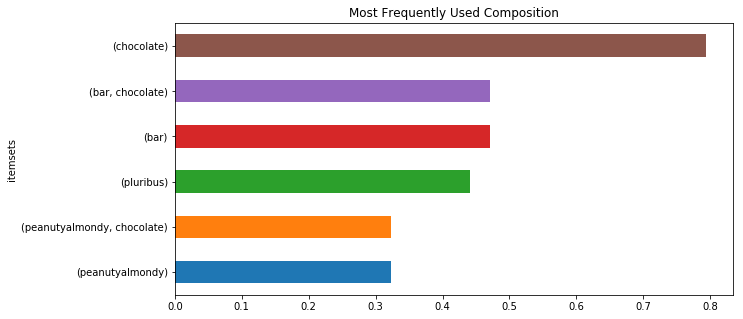

In [26]:
association.plot(kind='barh',x='itemsets',y='support',title=f'Most Frequently Used Composition',sort_columns=True,figsize = (10,5),legend=False)

## 8.3 Feature Importance of Various Attributes

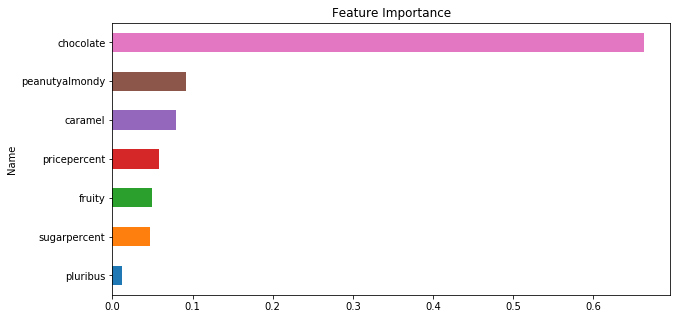

In [27]:
from sklearn import tree
reg = tree.DecisionTreeRegressor(max_depth=3).fit(data[data.columns[1:-1]],data[data.columns[-1]])
imp = pd.DataFrame.from_dict({'Name':data.columns[1:-1],'Importance':reg.feature_importances_})
imp_plt = imp.sort_values(by='Importance',ascending=True).reset_index(drop=True)
imp_plt[imp_plt.Importance>0].plot(kind='barh',x='Name',y='Importance',title='Feature Importance',sort_columns=True,figsize = (10,5),legend=False)

# 9. Model Building : 

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

After that we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(data[data.columns[1:-1]],data[data.columns[-1]], test_size=0.30, random_state=0)
rmse_err = []



Lets build different Regression model. We will train each model by train dataset and then predict the values for test dataset to calculate the RMSE error value to find how good a particular model fits 

## 9.1 Linear Regression Model

In [29]:
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression().fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,lr_reg.predict(X_test))))
rmse_err[-1]

10.484833498538785

## 9.2 Decision Tree Model

In [30]:
from sklearn.tree import DecisionTreeRegressor
import math
reg = DecisionTreeRegressor(random_state=0).fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,reg.predict(X_test))))
rmse_err[-1]

13.680767938409577

## 9.3 Decision Tree Model with GridSearch

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
decision_tree_regressorer = DecisionTreeRegressor(random_state = 0)
tree_para = [{'max_depth': range(1,30),'max_features': ['sqrt', 'log2', None] }]
grid_search = GridSearchCV(decision_tree_regressorer,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,grid_search.predict(X_test))))
rmse_err[-1]

C:\Users\prasu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


11.68181884086369

## 9.4 Random Forest Model

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=0).fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,rf_reg.predict(X_test))))
rmse_err[-1]

8.961223162991345

## 9.5 Random Forest Model with RandomizedSearch

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": range(1,10), 
              "bootstrap": [True, False],
              "n_estimators": [100, 200, 400, 800, 1000], 
              'max_features': ['sqrt', 'log2', None]
             }
n_iter_search = 10
random_search = RandomizedSearchCV(rf_reg, param_distributions = param_dist,n_iter = n_iter_search,n_jobs = -1,random_state=0)
random_search.fit(X_train, y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,random_search.predict(X_test))))
rmse_err[-1]

C:\Users\prasu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


11.681098846490828

## 9.6 Ridge Regression

In [34]:
from sklearn.linear_model import Ridge
r_reg = Ridge(alpha = .5).fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,r_reg.predict(X_test))))
rmse_err[-1]

10.504974358954565

## 9.7 Lasso Regression

In [35]:
from sklearn.linear_model import Lasso
l_reg = Lasso(alpha = 0.1).fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,l_reg.predict(X_test))))
rmse_err[-1]

10.567698410815941

## 9.8 ElasticNet Regression

In [36]:
from sklearn.linear_model import ElasticNet
en_reg = ElasticNet(alpha=.05, l1_ratio=0.5).fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,en_reg.predict(X_test))))
rmse_err[-1]

10.73250022336545

## 9.9 Polinomial Regression

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)

lg = LinearRegression().fit(X_, y_train)

rmse_err.append(math.sqrt(mean_squared_error(y_test,lg.predict(X_test_))))
rmse_err[-1]

44.65726017662246

## 10. Model Comparision

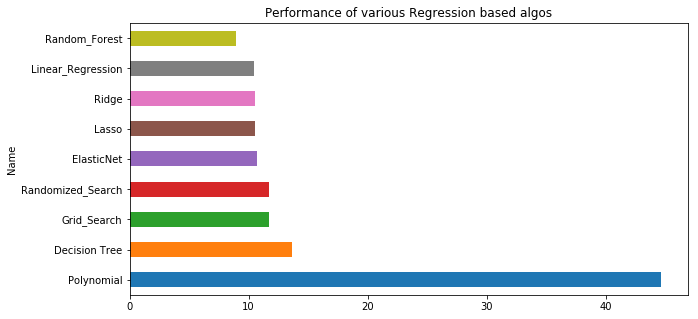

In [38]:
models = ['Linear_Regression','Decision Tree','Grid_Search','Random_Forest','Randomized_Search','Ridge','Lasso','ElasticNet','Polynomial']
pd.DataFrame.from_dict({'Name':models,'RMSE':rmse_err}).sort_values(by='RMSE',ascending=False).plot(x='Name',y='RMSE',kind='barh',sort_columns=True,figsize = (10,5),legend=False,title='Performance of various Regression based algos')

# 11. Conclusion

 - Hence, from above discussion, we can see that __Random forest__ model fits best for the given dataset, as RMSE is least in this case. 


 - And __Polynomial Regression__ Model doesn't work good for this dataset, as clearly the RMSE is maximum in this case.